# Part A 

In [164]:
# Importing the basic required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Reading the Datasets

In [165]:
jan = pd.read_csv('Sales_of_Electronics_Products_January_2019.csv')
feb = pd.read_csv('Sales_of_Electronics_Products_February_2019.csv')
mar = pd.read_csv('Sales_of_Electronics_Products_March_2019.csv')
apr = pd.read_csv('Sales_of_Electronics_Products_April_2019.csv')
may = pd.read_csv('Sales_of_Electronics_Products_May_2019.csv')
jun = pd.read_csv('Sales_of_Electronics_Products_June_2019.csv')
jul = pd.read_csv('Sales_of_Electronics_Products_July_2019.csv')
aug = pd.read_csv('Sales_of_Electronics_Products_August_2019.csv')
sep = pd.read_csv('Sales_of_Electronics_Products_September_2019.csv')
oct = pd.read_csv('Sales_of_Electronics_Products_October_2019.csv')
nov = pd.read_csv('Sales_of_Electronics_Products_November_2019.csv')
dec = pd.read_csv('Sales_of_Electronics_Products_December_2019.csv')

### Merging into single dataset

In [166]:
sales=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Cleaning the Merged dataset

In [167]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [168]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [169]:
#droping null values
sales.dropna(subset = ['Order ID'], inplace=True)

In [170]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## A.1 
Month of maximum sales and the sales amount

In [171]:
# Adding a month and month name column
sales['Month'] = sales['Order Date'].str[:2]
sales = sales.loc[sales['Month']!= 'Or']
sales['Month'] = sales['Month'].astype('int32')
sales['Month Name'] = sales['Month'].apply(lambda x: calendar.month_name[x])

In [172]:
# Converting price each column into float type
sales['Price Each'] = sales['Price Each'].astype('float')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  object 
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Month Name        185950 non-null  object 
dtypes: float64(1), int32(1), object(6)
memory usage: 12.1+ MB


In [173]:
# Converting Quantity Ordered column into int type and adding total sales column
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int32')
sales['Total Sales'] = sales['Price Each']*sales['Quantity Ordered']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,January,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,January,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,January,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,January,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,January,11.99


In [174]:
# Making a Dataframe with total sales per month
per_month = sales.groupby(['Month Name','Month'])
sales_per_month = per_month['Total Sales'].sum().reset_index()
sales_per_month.sort_values('Month', inplace=True)

In [175]:
sales_per_month

,Month Name,Month,Total Sales
4,January,1,1822256.73
3,February,2,2202022.42
7,March,3,2807100.38
0,April,4,3390670.24
8,May,5,3152606.75
6,June,6,2577802.26
5,July,7,2647775.76
1,August,8,2244467.88
11,September,9,2097560.13
10,October,10,3736726.88


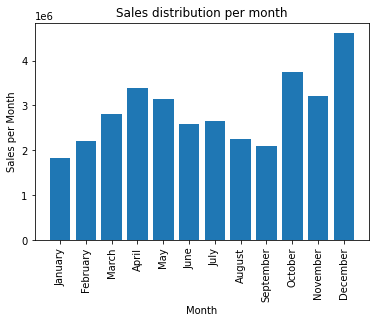

In [176]:
plt.figure(figsize=(6,4))
plt.bar(sales_per_month['Month Name'],sales_per_month['Total Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Sales per Month')
plt.title('Sales distribution per month')
plt.show()

### December had the highest sale with a earning of 4613443.34

## A.2
City with maximum sales and the sales amount

In [177]:
# Extracting the City from the address and creating a new city column
sales['Purchase Address'] = sales['Purchase Address'].str.split(',')
sales['City'] = sales['Purchase Address'].apply(lambda x: x[1])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"[944 Walnut St, Boston, MA 02215]",1,January,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"[185 Maple St, Portland, OR 97035]",1,January,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"[538 Adams St, San Francisco, CA 94016]",1,January,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"[738 10th St, Los Angeles, CA 90001]",1,January,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"[387 10th St, Austin, TX 73301]",1,January,11.99,Austin


In [178]:
# Restoring the Address field to as it was before
sales['Purchase Address'] = sales['Purchase Address'].str.join(',')

In [179]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,January,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,January,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,January,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,January,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,January,11.99,Austin


In [180]:
# Making a Dataset with total sales per city
per_city = sales.groupby(['City'])
sales_per_city = per_city['Total Sales'].sum().reset_index()


In [181]:
sales_per_city

,City,Total Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


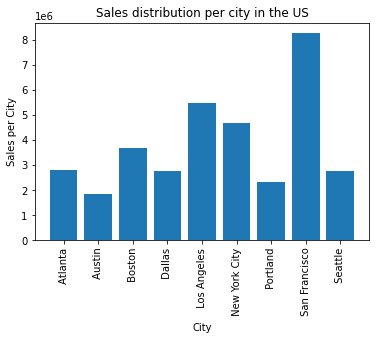

In [182]:
plt.figure(figsize=(6,4))
plt.bar(sales_per_city['City'],sales_per_city['Total Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales per City')
plt.title('Sales distribution per city in the US')
plt.show()

### San Francisco has the highest Sales with 8262203.91 total sales

## A.3
Best time of the day to display a TV ad

In [183]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,January,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,January,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,January,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,January,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,January,11.99,Austin


In [184]:
#Converting Order Date Column from String to Date-time data type
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [185]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Month Name        185950 non-null  object        
 8   Total Sales       185950 non-null  float64       
 9   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(5)
memory usage: 14.2+ MB


In [186]:
sales.head()  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99,Austin


In [187]:
# creating a separate order hour and order minute column
sales['Order Hour'] = sales['Order Date'].dt.hour
sales['Order Minute'] = sales['Order Date'].dt.minute
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City,Order Hour,Order Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99,Austin,11,59


In [188]:
# Making a Dataframe with total sales per hour
per_hour = sales.groupby(['Order Hour'])
sales_per_hour = per_hour['Total Sales'].sum().reset_index()
sales_per_hour.head(24)

,Order Hour,Total Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


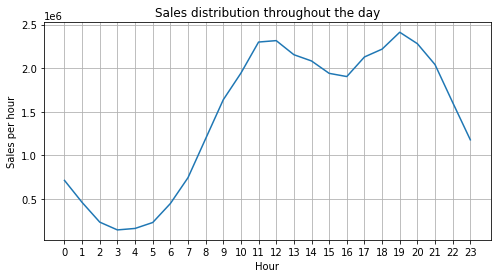

In [189]:
plt.figure(figsize=(8,4))
plt.plot(sales_per_hour['Order Hour'],sales_per_hour['Total Sales'])
plt.grid()
plt.xlabel('Hour')
plt.xticks(sales_per_hour['Order Hour'])
plt.ylabel('Sales per hour')
plt.title('Sales distribution throughout the day')
plt.show()

### Best time of the day to display a TV ad is between 6pm to 8pm. 11am to 12pm is also a good time for a TV ad.

## A.4
Products that are sold together

In [190]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City,Order Hour,Order Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99,Austin,11,59


In [191]:
# Adding a Grouped Column
df = sales[sales['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [192]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City,Order Hour,Order Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.95,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.99,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,150.00,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,11.52,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,January,400.00,New York City,11,19,"Vareebadd Phone,Wired Headphones"


In [193]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [194]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### These are the products brought together

## A.5
The most sold product

In [195]:
prod_group = sales.groupby('Product')

In [196]:
quantity_per_prod = prod_group['Quantity Ordered'].sum().reset_index()
price_per_prod = prod_group['Price Each'].mean().reset_index()

In [197]:
quantity_per_prod

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [198]:
price_per_prod

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


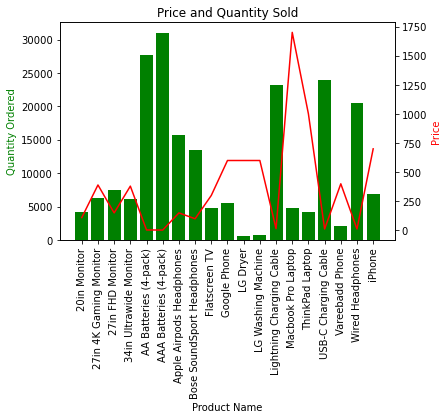

In [199]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(quantity_per_prod['Product'],quantity_per_prod['Quantity Ordered'], color='green')
ax2.plot(price_per_prod['Product'],price_per_prod['Price Each'],'r-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='green')
ax2.set_ylabel('Price',color='red')
ax1.set_xticklabels(quantity_per_prod['Product'],rotation='vertical')
plt.title('Price and Quantity Sold')
plt.show()

### We can notice that AAA Batteries (4-pack) is sold the most (31017 units) because of its low price (2.99). Similar trend follows with lower cost products